# Economics of mining solids versus liquids or gases  

The objectives of this notebook are... 

* Consider the economics of digging a hole in the ground.
* Compare generic business plans for mining rock versus petroleum.
* Analyze and plot data from two specific examples: the Bingham copper mine; and the Maui petroleum field.

---

## Digging a hole in the ground

The shape and depth of a mineable resource determines the design of a mine. It is rare that mines fill up the hole as they go (some open-cast mines can), so the more you mine, the bigger the hole in the ground. 

Technical goals are...

* Mine as little worthless rock as possible.
* Ensure steep mined rock faces are stable: less than a certain slope; or are supported (e.g. underground).
* Design the spoil heap of unwanted rock so that it does not fall down and does not pollute air, surface-water or groundwater.

A key economic parameter is the **stripping ratio**, which is defined as the ratio of the weight of waste rock to the weight of resource (ore) that was mined during a particular interval of time.

Consider the situation of an ore body dipping at angle $\alpha$ and with a stable maximum slope angle of $\beta$.  
The mine is long and thin, so we just consider the cross-section.

![Dipping ore body](./ESCI453_holeInGround_mining_v1.png)

How does the stripping ratio evolve with time as the hole becomes deeper, assuming constant area removal rate and it takes 1 year before any waste rock is removed (stripping ratio is zero until then).


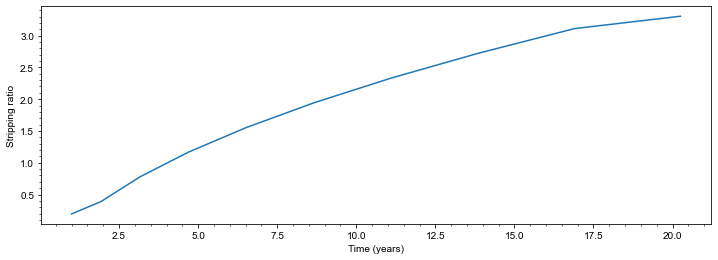

In [1]:
''' Calculate and plot stripping ratio for each depth increment '''

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import rc
rc("pdf", fonttype=42)
rc('font',size=10,family='Arial')

# Input values
alpha = np.radians(5.)
beta = np.radians(35.)
timeToZ0 = 1.0 #years
h = 1.0

# Maximum depth before waste rock needs to be mined
z0 = h * np.tan(beta)/(np.tan(alpha)+np.tan(beta))

# Instantiate array of n z (depth) values with z0 <= z <= zmax
n = 10
zmax = 4.0
z = np.linspace(z0,zmax,n)
dz = z[1]-z[0]

# Width of pit for each depth
x1 = z / np.tan(alpha)
x2 = z / np.tan(beta)

# Area of triangle at each depth (pit cross-sectional area)
minedTotal = 0.5 * (x1 + x2) * z

# Area removed to get to z0 is the first value, so normalize & compute times
minedTime = timeToZ0 * minedTotal / minedTotal[0]

# Area of mined ore is the first triangle + parallelogram (see figure)
minedOre = minedTotal[0] + (z-z0)*h/np.tan(alpha)

minedWaste = minedTotal - minedOre

strippingRatio = np.gradient(minedWaste) / np.gradient(minedOre)

plt.figure(figsize=(12,4))
plt.minorticks_on()
plt.xlabel('Time (years)')
plt.ylabel('Stripping ratio')
plt.plot(minedTime,strippingRatio)

## Components of a mining business model

### Exploration and discovery  

Petroleum exploration is expensive and time-consuming. It typically costs 10-50 M\\$ for a seismic survey and 100-200 M\\$ to drill an offshore borehole (maybe 10-100 M\\$ for an onshore borehole). Several surveys and boreholes are needed to have confidence to support the conclusion of economic discovery. Less than 1 in 3 'wildcat' boreholes make economic discoveries. Petroleum exploration is expensive and failures must be paid for by successful production elsewhere.

Almost all mineral discoveries are onshore and require surface mapping by geologists and shallow (<1 km depth, usually <200 m) drilling to recover samples that can be assayed to determine ore grade. Cheap (typically <1 M\\$) ground or airborne geophysical surveys (e.g. magnetic or electromagnetic) may also be carried out. Minerals industry drilling may be able to drill >100 boreholes for 1 M\\$, so cheaper and safer than petroleum. It is much easier to cross the **economic** threshold in minerals exploration, because the costs of production from a small open-cast mine can be very low (just a single digger and a truck to take away the ore) and the first material mined is often the most profitable. Eventually such a mine might be scaled up to a huge mine, but it is possible to start small and hence offset further exploration, appraisal and development costs by highly-profitable initial production.  

### Appraisal and development  

Appraisal usually requires additional drilling. For petroleum this will start before production infrastructure is installed, because the scale of production infrastructure that needs to be developed must be designed and justified. The appraisal and development plan in a petroleum project may be very expensive >1 B\\$. In mining, most appraisal and development is relatively low-cost and done in parallel with production, to ensure that proven reserves are sufficient to meet demand for the next 5-10 years.

### Production  

The cost of production of petroleum, once infrastructure is developed, is relatively low, because the liquid or gas is extracted without any need to remove rock. Fluids may be pumped into the underground reservoir, but they are usually cheap local fluids (e.g. water or liquified carbon dioxide extracted from produced petroleum). There may even be commercial value related to injection (e.g. liquefied carbon dioxide or waste water storage).

The cost of producing (and processing) a mineral commodity is relatively high, because large amounts of waste rock and gangue (unwanted minerals in the ore) are usually present, e.g. gold ore may be commercial at a concentration of 1 ppm gold. As the hole in the ground becomes larger, the costs of monitoring slope stability, management of groundwater, and maintenance of waste scale up. 

### Clean-up  

To abandon petroleum production at a site simply requires filling the holes with cement and then removing or making safe the surface infrastructure. There is research that shows in some circumstances production facilities are cut off at a safe depth for shipping can actually benefit the local ecosystem (provide an artificial reef), so they are being required to be left.  

In contrast, mines leave behind huge holes in the ground and huge deposits of waste rock that often contain toxic materials that leach into groundwater. There have been several examples of collapse of waste rock that have killed many people and caused terrible pollution. It is almost never the case that mines are restored to their natural state (as is usually the case with petroleum), and it is usually the case that long-term environmental issues are created, i.e. insufficient funds are allocated to the clean-up.


## Thought experiment: economic comparisons of mining and petroleum 

Consider the situation of two parallel 30 year plans (over-simpified) that compare oil production with mining a rock such as coal. We consider a large coal mine that produces 200 Mton at a sale price of 50 \\$/ton (we reuse the code above); and a moderate-sized oil field that produces 200 Mmbbl at 50 \\$/mbbl. Total revenue for both is 10 B\\$. Where does that money go, and when? 

The coal mining business plan has a 5 year, but relatively cheap exploration and appraisal program at the start, whereas that phase for the oil field is 9 years and much more expensive. In contrast, the oil field takes just one year to decomission, whereas the mine takes 5 years.

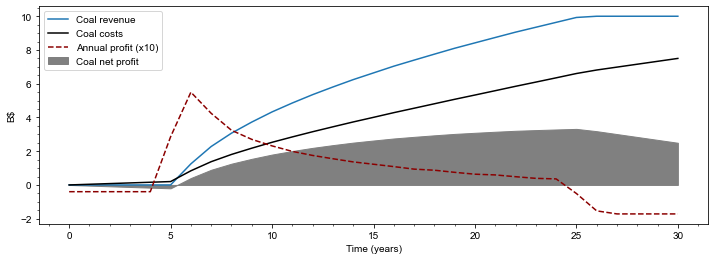

In [2]:
years = np.arange(0,31,1)

# Coal business model (all B$)
# 1. Exploration and appraisal for 5 years
# 2. Cost proportional to volume of rock mined
# 3. Clean-up for last 5 years
# Coal revenue proportional to amount of rock mined
initialCost = 0.2
totalMiningCost = 5.0
totalMaintenanceCost = 2.0
finalCost = 0.5
totalRevenue = 10.0

# Build exploration-appraisal phase at start and clean-up at end then interpolate
coalTime = np.append(np.append([0,5],minedTime+5),[30])
coalMined = np.append(np.append([0,0],minedOre),minedOre[-1])
coalAndWaste = np.append(np.append([0,0],minedOre),minedOre[-1])
coalMined = interp1d(coalTime,coalMined)(years)
coalAndWaste = interp1d(coalTime,coalAndWaste)(years)

# Finance time series
coalRevenue = totalRevenue * coalMined / coalMined[-1]
costsMining = totalMiningCost * coalAndWaste / coalAndWaste[-1]
costsMaintenance = totalMaintenanceCost * np.cumsum(coalAndWaste)/np.cumsum(coalAndWaste)[-1]
costsOther = interp1d([0,5,25,30],[0,initialCost,initialCost,finalCost])(years)
coalCosts = costsMining + costsMaintenance + costsOther
coalProfit = coalRevenue - coalCosts
coalProfitAnnual = np.gradient(coalProfit)

plt.figure(figsize=(12,4))
plt.minorticks_on()
plt.xlabel('Time (years)')
plt.ylabel('B$')
plt.plot(years,coalRevenue,label='Coal revenue')
plt.fill_between(years,coalRevenue-coalCosts,color='grey',label='Coal net profit')
plt.plot(years,coalCosts,color='black',label='Coal costs')
plt.plot(years,coalProfitAnnual*10,color='darkred',linestyle='--',label='Annual profit (x10)')
plt.legend()

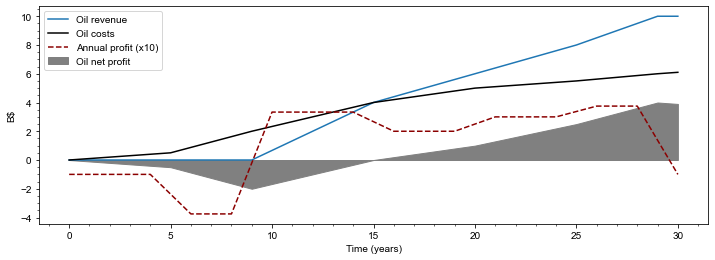

In [3]:
# Oil business model (all B$)
oilTime =    [0,5,9,15,20,25,29,30]
oilCost =   interp1d(oilTime,[0,0.5,2.0,4.0,5.0,5.5,6.0,6.1])(years)
oilRevenue = interp1d(oilTime,[0,0,0,4,6,8,10,10])(years)
oilProfit = oilRevenue - oilCost

plt.figure(figsize=(12,4))
plt.minorticks_on()
plt.xlabel('Time (years)')
plt.ylabel('B$')
plt.plot(years,oilRevenue,label='Oil revenue')
plt.fill_between(years,oilProfit,color='grey',label='Oil net profit')
plt.plot(years,oilCost,color='black',label='Oil costs')
plt.plot(years,np.gradient(oilProfit)*10,color='darkred',linestyle='--',label='Annual profit (x10)')
plt.legend()

## Key learning point

Although there are many things that could be criticised about the above scenarios, a point of difference remains robust: petroleum has uniform profitability or even peak profitability towards the end of its business plan, and has minimal clean-up costs. In contrast, profits from mining solids start to dry up long before significant responsibilities of decomissioning the mine (a much bigger task than a petroleum project) become apparent to local people and regulators.